#### What is Tensor Flow?

Tensorflow architecture works in three parts:
- Preprocessing the data 
- Build the model
- Train and estimate the model

### Import The Fashion MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

this mnist in module form now load this data in to a real variable

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
# 10 catagories
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

all ten catgories information is at https://github.com/zalandoresearch/fashion-mnist

In [11]:
class_names = ['top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

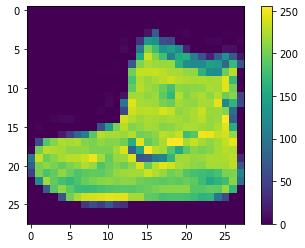

In [13]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

How we know that this is boot so first check y_train values

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

for X_train[0] we get value of y_train[0] that is 9 in class name 9th catagory is Boot

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

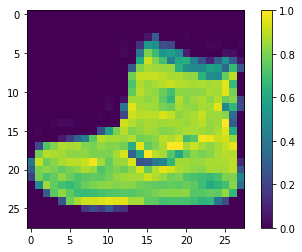

In [16]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

These values are in between 0 and 1 now it is ready to feed in nueral network

### Build the model with TF 2.0

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##### Model compilation 
- Loss Function
- Optimizer 
- Metrics

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4976 - accuracy: 0.8267
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3760 - accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3353 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3118 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2945 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2792 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2688 - accuracy: 0.8999
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2557 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2473 - accuracy: 0.9088
Epoch 10/10
60

In [22]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3364 - accuracy: 0.8815
0.8815


### prediction with sklearn also

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = model.predict_classes(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.8815

In [26]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

### Make a prediction On some random test image on just a Single Image Seperately 

In [27]:
# .predict give array of continuous values
pred = model.predict(X_test)

In [28]:
pred

array([[8.8995662e-08, 1.9683174e-12, 5.2033583e-10, ..., 2.0616153e-02,
        3.4107053e-08, 9.7844064e-01],
       [2.0890239e-04, 4.7974781e-13, 9.9656397e-01, ..., 1.5460528e-13,
        3.5295364e-11, 1.7754513e-13],
       [3.1139223e-08, 1.0000000e+00, 1.1197916e-10, ..., 2.7760277e-26,
        1.2862156e-13, 1.8656171e-16],
       ...,
       [1.0356978e-06, 7.9162996e-12, 1.5382913e-07, ..., 4.0376345e-11,
        9.9998510e-01, 2.5483929e-12],
       [4.3461478e-07, 9.9989593e-01, 5.0417346e-09, ..., 2.6915056e-13,
        1.2935336e-09, 7.4496420e-08],
       [1.1830075e-05, 3.5128203e-08, 1.3656049e-05, ..., 1.9676970e-02,
        2.5965009e-04, 1.1091135e-05]], dtype=float32)

In [29]:
pred.shape

(10000, 10)

In [30]:
y_pred[0]
# comapare this value with pred 9th position that shows the probability of 96% 
# of having image as a boot

9

In [31]:
y_pred[1]
# comapare this value with pred 9th position that shows the probability of 98% 
# of having image as a pullover

2